---
<center><img src="https://upload.wikimedia.org/wikipedia/commons/2/2c/Logo_U.T.P.png" width="400"/></center>
<h1 style="font-size:5x"><center>Práctica Número 2</center></h1>
<h1 style="font-size:5x"><center>Presentado por:</center></h1>
<h1 style="font-size:5x"><center>Carlos Lino Rengifo Renteria</center></h1>
<h1 style="font-size:5x"><center>Julio Fabio De La Cruz</center></h1>
<h1 style="font-size:5x"><center>Presentado A:</center></h1>
<h1 style="font-size:5x"><center>MSc. Edwin Andres Quintero Salazar</center></h1>

---

# 1. Conversión a escala de grises   
Crear un programa en basado en ciclos, que permita la conversión de imágenes RGB en escala de grises, utilizando las siguientes ecuaciones\cite{Gonzalez:2001:DIP:559707}:  

\begin{eqnarray}
  Y&=&0.2989R&+&0.5870G&+&0.1140B\\  
  Y&=&0.3333R&+&0.3333G&+&0.3333B
\end{eqnarray}

### Solución:  
Según la recomendación Unión internacional de Telecomunicaciones BT.601-7 (03/2011) , la construcción de la señal de luminancia esta dada por:  

\begin{equation}
  E_Y^{'}=0,299E_R^{'}+0,587E_G^{'}+0,114E_B^{'}
\end{equation}

Para ver la imagen en escala de grises empleando los valores de luminacia se realizó una funcion denominada <font style="color:##ff4f00">convertirGrisITU</font> que recibe como parámetro de entrada la imagen fuente en formato RGB y retorna una imagen en escala de grises.  
La siguiente conversión a escala de grises corresponde a la siguiente ecuación, en donde los valores RGB se ponderan de igual manera \cite{Gonzalez:2003:DIP:993475}. 

\begin{equation} 
  Y=\frac{R+G+B}{3}
\end{equation}

Para ver la imagen en escala de grises empleando el promedio de los valores RGB se realizó la función <font style="color:##ff4f00">convertirGrisProm</font> que recibe como parámetro de entrada la imagen fuente en formato RGB y retorna una imagen en escala de grises.

### Bibliotecas y Funciones Empleadas  
Para el procesamiento básico de images se empleo la bliblioteca PIL que permite las operaciones de imagenes accediendo a los pixeles que la componen.  
Las funciones realizadas para las conversiones a escala de imagenes emplean ciclos for anidados para hacer el recorrido de la imagen pixel por pixel y asi realizar la conversión.  

In [83]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def covertirGrisITU(Imagen):
    Ancho, Alto = Imagen.size
    ImagenNueva = Image.new("RGB", (Ancho, Alto), "white")
    Pixeles = ImagenNueva.load()
    for i in range(Ancho):
        for j in range(Alto):
            Pixel = Imagen.getpixel((i, j))
            Rojo =  Pixel[0]
            Verde = Pixel[1]
            Azul =  Pixel[2]
            Gris = (Rojo * 0.299) + (Verde * 0.587) + (Azul * 0.114)
            Pixeles[i, j] = (np.uint8(Gris), np.uint8(Gris), np.uint8(Gris))
    return ImagenNueva
   # return Pixeles

def covertirGrisProm(Imagen):
    Ancho, Alto = Imagen.size
    ImagenNueva = Image.new("RGB", (Ancho, Alto), "white")
    Pixeles = ImagenNueva.load()
    for i in range(Ancho):
        for j in range(Alto):
            Pixel = Imagen.getpixel((i, j))
            Rojo =   Pixel[0]
            Verde = Pixel[1]
            Azul =  Pixel[2]
            Gris = (Rojo * 0.333) + (Verde * 0.333) + (Azul * 0.333)
            Pixeles[i, j] = (np.uint8(Gris), np.uint8(Gris), np.uint8(Gris))
    return ImagenNueva

Analizar las diferencias presentadas en las imágenes
finales.

### Pruebas de procesamiento en escala de grises  
Ya con las funciones implementadas se probó con diferentes imagenes las conversiones a escala de grises.  
#### 1. Prueba con Mandril.jpg

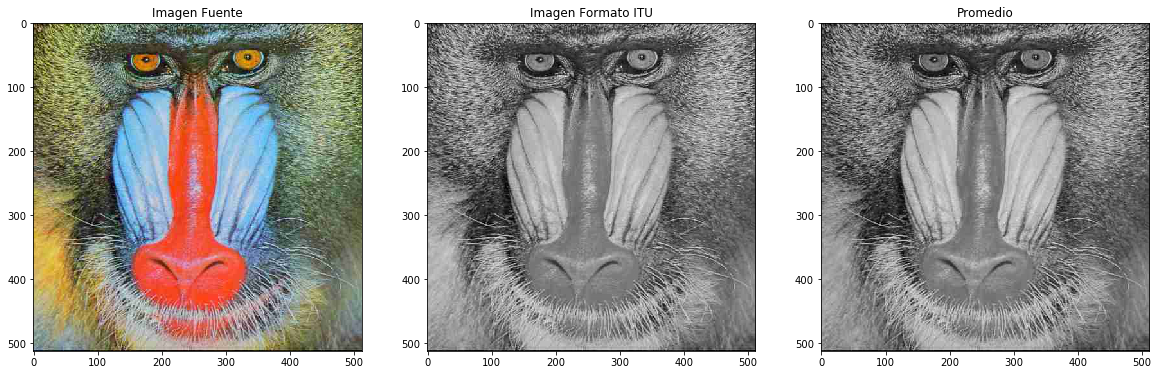

In [84]:
ImagenFuente = Image.open('imagenes/Mandril.jpg')
ImagenGrisITU=covertirGrisITU(ImagenFuente)
ImagenGrisPromedio=covertirGrisProm(ImagenFuente)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,nrows=1, figsize=(20,20))
ax1.set_title('Imagen Fuente')
ax1.imshow(ImagenFuente)

ax2.set_title('Imagen Formato ITU')
ax2.imshow(ImagenGrisITU)

ax3.set_title('Promedio')
ax3.imshow(ImagenGrisPromedio)
plt.show()

<hr style="height:1px;border-top:1px solid #f00" />
<h2 style>Análisis</h2>
Para está imagen no se nota ninguna diferencia a simple vista hace falta un análisis más exhautivo

<hr style="height:1px;border-top:1px solid #f00" />
Para un análisis más exhaustivo veamos el análisis en un pixel, para eso creamos la siguiente función que crea una imagen $500 \times 500$ con un solo valor RGB, imprime el valor de la conversión a escalas de grises ITU y promedio y además muestra la gráfica

In [45]:
from PIL import Image
from ipywidgets import interact
import numpy as np

#creando una imagen con un único valor RGB
def Pruebas(r,g,b):
    rgbArray = np.ones((500,500,3), 'uint8')
    rgbArray[..., 0] = r
    rgbArray[..., 1] = g
    rgbArray[..., 2] = b

    ImagenNueva = Image.fromarray(np.uint8(rgbArray))
    ImagenNueva.save('test.jpg', format='JPEG', subsampling=0, quality=100)

    print("ITU:",r*0.299+g*0.5870+b*0.1140)
    print("Promedio:",r*0.3333+g*0.3333+b*0.3333)
    ImagenFuente = Image.open('test.jpg')
    ImagenGrisITU=covertirGrisITU(ImagenFuente)
    ImagenGrisPromedio=covertirGrisProm(ImagenFuente)
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3,nrows=1, figsize=(20,20))
    ax1.set_title('Imagen Fuente')
    ax1.imshow(ImagenFuente)

    ax2.set_title('Imagen Formato ITU')
    ax2.imshow(ImagenGrisITU)

    ax3.set_title('Promedio')
    ax3.imshow(ImagenGrisPromedio)
    plt.show()


<h2 style="color:olive"> Imagen con valores de rojo alto </h2>

ITU: 76.24499999999999
Promedio: 84.9915


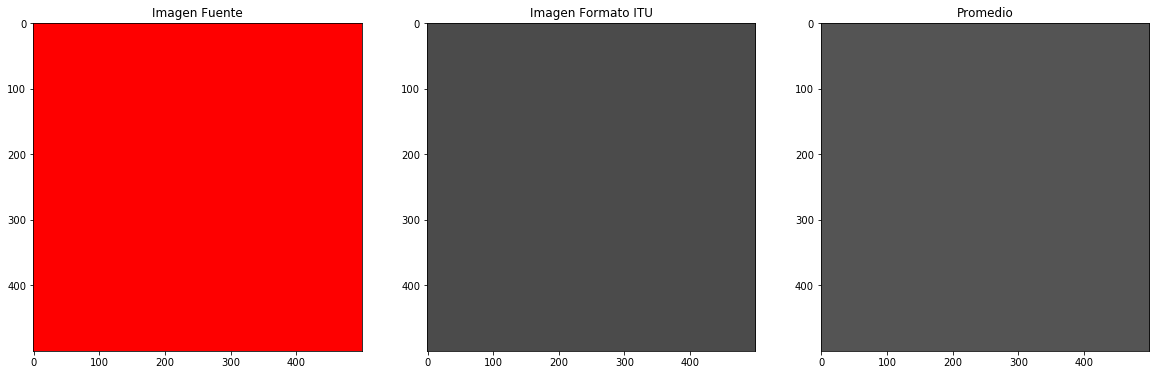

In [44]:
Pruebas(255,0,0)

<h2 style="color:olive"> Imagen con valores de verde altos</h2>

ITU: 149.685
Promedio: 84.9915


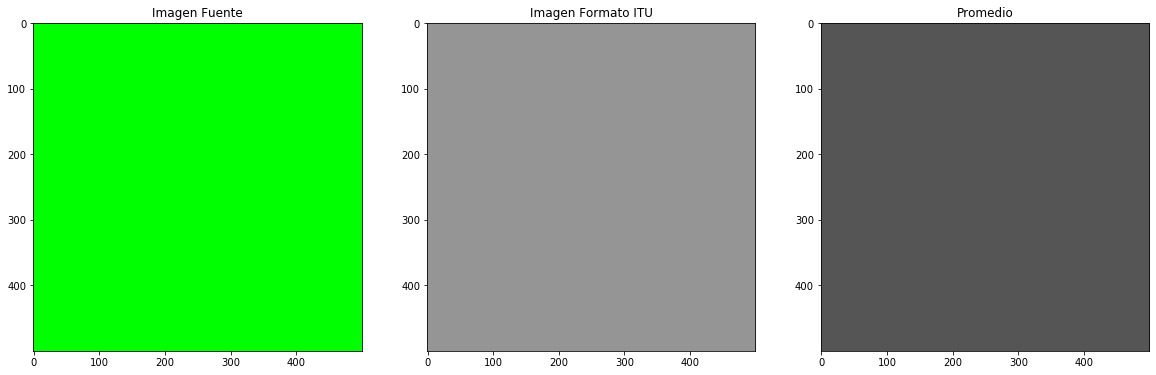

In [46]:
Pruebas(0,255,0)

<h2 style="color:olive"> Imagen con valores de azul alto </h2>

ITU: 29.07
Promedio: 84.9915


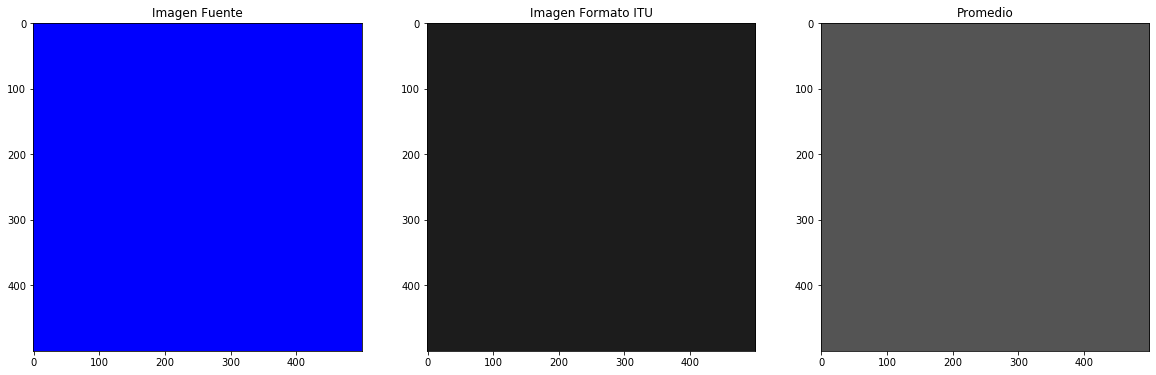

In [47]:
Pruebas(0,0,255)

In [49]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [57]:
interact(Pruebas, r=widgets.BoundedIntText(value=255,min=0,max=255,step=1,description='R:',disabled=False),
                  g=widgets.BoundedIntText(value=0,min=0,max=255,step=1,description='R:',disabled=False),
                  b=widgets.BoundedIntText(value=0,min=0,max=255,step=1,description='R:',disabled=False));

interactive(children=(BoundedIntText(value=255, description='R:', max=255), BoundedIntText(value=0, descriptio…

<hr style="height:1px;border-top:1px solid #f00" />
<h2 style>Análisis</h2>
Se nota que cuando la imagen tiene valores altos de Rojo tiende a ser un poco más oscura en el formato ITU que en el formato promedio.
Cuando la imagen tiene valores altos de verdes la imagen tiende a ser más clara en el formáto ITU que en el promedio.
Cuando la imagen tiene valores altos de azul la imagen tiende a ser más oscura en el formato ITU que en el promedio. 

De aquí que la conversión propuesta por ITU, permite una diferenciación en los canales de colores RGB tal como se presentó en los ejemplos donde la conversión a escala de grises del formato promedio permanecia constante.

<h2 style="color:olive"> Guardando una imágen en python </h2>
Para guardar una imagen Python utiliza la función <font style="color:##ff4f00"> save </font> del la ibreria PIL

im.save('/Directorio/a/imagen.jpg', format='JPEG', subsampling=0, quality=100)

# 2. Cálculo del histograma    
Crear un programa en python basado en ciclos, que permita observar el histograma de las imágenes en escala de grises obtenidas durante el desarrollo de la práctica No 1. Comparar los histogramas arrojados por el algoritmo a partir de las imágenes en escala de grises obtenidas mediante las dos ecuaciones de conversión estudiadas en clase.  
### Solución:  
Nuevamente empleamos las dos funiones para convertir las imagenes en escalas de gris empleando el formato BT.601 y promedio.

In [137]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
ImagenFuente = Image.open('imagenes/Mandril.jpg')

def getRojo(Val):
    return '#%02x%02x%02x' % (Val, 0, 0)
def getVerde(Val):
    return '#%02x%02x%02x' % (0, Val, 0)
def getAzul(Val):
    return '#%02x%02x%02x' % (0, 0, Val)

def covertirGrisITU(Imagen):
    Ancho, Alto = Imagen.size
    ImagenNueva = Image.new("RGB", (Ancho, Alto), "white")
    Pixeles = ImagenNueva.load()
    for i in range(Ancho):
        for j in range(Alto):
            Pixel = Imagen.getpixel((i, j))
            Rojo =   Pixel[0]
            Verde = Pixel[1]
            Azul =  Pixel[2]
            Gris = (Rojo * 0.299) + (Verde * 0.587) + (Azul * 0.114)
            Pixeles[i, j] = (int(Gris), int(Gris), int(Gris))
    return ImagenNueva

def covertirGrisProm(Imagen):
    Ancho, Alto = Imagen.size
    ImagenNueva = Image.new("RGB", (Ancho, Alto), "white")
    Pixeles = ImagenNueva.load()
    for i in range(Ancho):
        for j in range(Alto):
            Pixel = Imagen.getpixel((i, j))
            Rojo =   Pixel[0]
            Verde = Pixel[1]
            Azul =  Pixel[2]
            Gris = (Rojo * 0.333) + (Verde * 0.333) + (Azul * 0.333)
            Pixeles[i, j] = (int(Gris), int(Gris), int(Gris))
    return ImagenNueva


### Prubas de cálculo del histograma  
Realizamos dos funciones para el cálculo del histograma para los dos formatos de escala de grises empleados  
#### Prueba con Mandril.jpg

In [155]:
def histogramaGrisITU(Imagen,aArray=False):
    if aArray == False:
        Ancho, Alto = Imagen.size
    else:
        Ancho=Imagen.shape[0]
        Alto =Imagen.shape[1] 
    
    histograma = np.zeros(256, np.float32)
    for i in range(Ancho):
        for j in range(Alto):
            Pixel = Imagen.getpixel((i, j))
            Rojo =   Pixel[0]
            Verde = Pixel[1]
            Azul =  Pixel[2]
            Gris = (Rojo * 0.299) + (Verde * 0.587) + (Azul * 0.114)
            histograma[int(Gris)] += 1
    for i in range(255):
        histograma[i]=histograma[i]/(Ancho*Alto)
    return histograma

def histogramaGrisProm(Imagen):
    Ancho, Alto = Imagen.size
    histograma = np.zeros(256, np.float32)
    for i in range(Ancho):
        for j in range(Alto):
            Pixel = Imagen.getpixel((i, j))
            Rojo =   Pixel[0]
            Verde = Pixel[1]
            Azul =  Pixel[2]
            Gris = Gris = (Rojo * 0.333) + (Verde * 0.333) + (Azul * 0.333)
            histograma[int(Gris)] += 1
    for i in range(255):
        histograma[i]=histograma[i]/(Ancho*Alto)
    return histograma


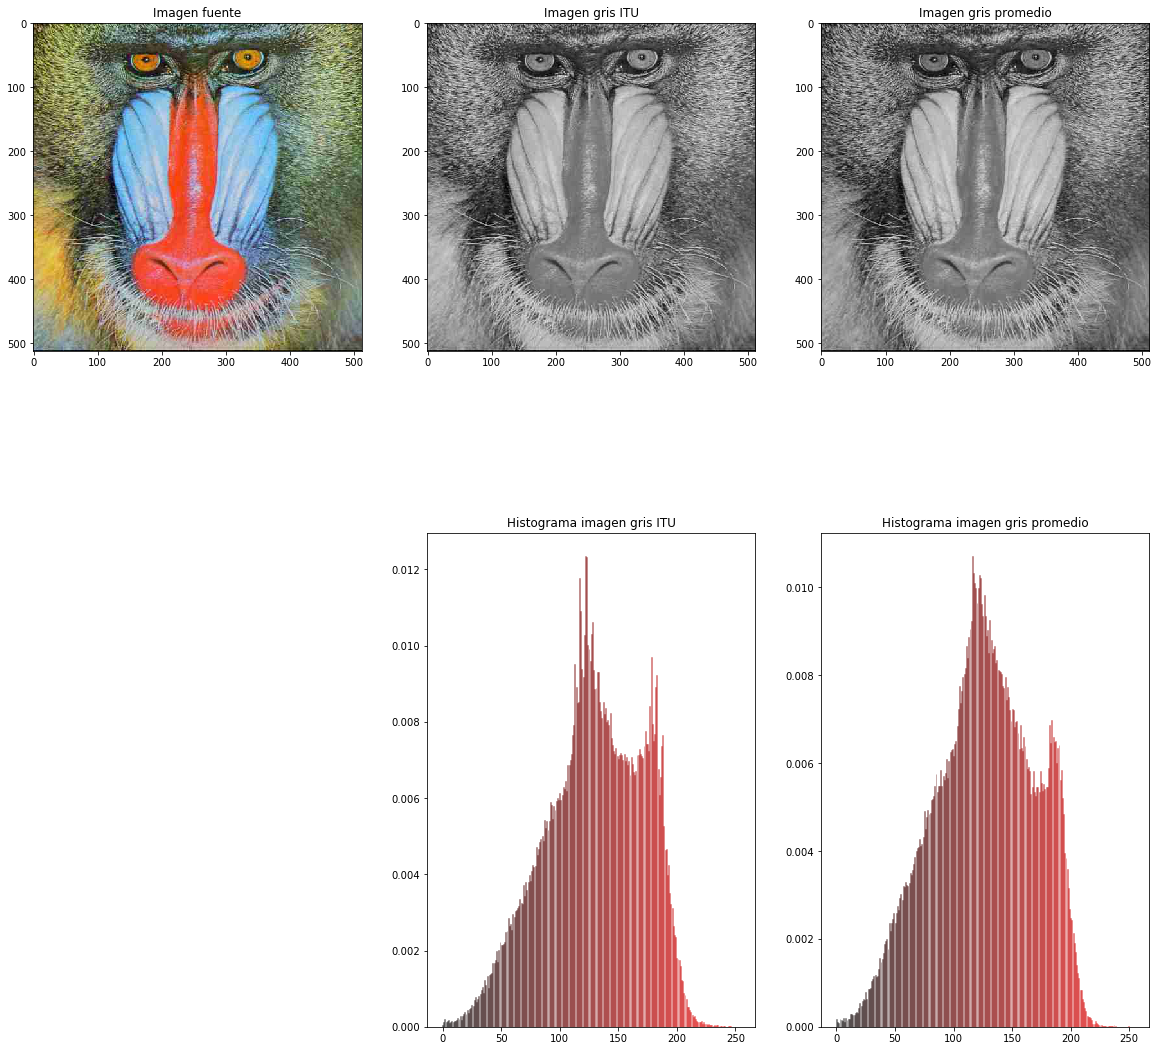

In [156]:
histograma1=histogramaGrisITU(ImagenFuente);
histograma2=histogramaGrisProm(ImagenFuente)
ImagenGrisITU=covertirGrisITU(ImagenFuente)
ImagenGrisPromedio=covertirGrisProm(ImagenFuente)

fig= plt.figure(figsize=(20,20))
ax = fig.add_subplot(2,3,1)
ax.set_title('Imagen fuente')
ax.imshow(ImagenFuente)
ax = fig.add_subplot(2,3,2)
ax.set_title('Imagen gris ITU')
ax.imshow(ImagenGrisITU)
ax = fig.add_subplot(2,3,3)
ax.set_title('Imagen gris promedio')
ax.imshow(ImagenGrisPromedio)


ax = fig.add_subplot(2,3,4)
ax.set_visible(False)

ax = fig.add_subplot(2,3,5)
ax.set_title('Histograma imagen gris ITU')
for i in range(0, 255):
    plt.bar(i, histograma1[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)


ax = fig.add_subplot(2,3,6)
ax.set_title('Histograma imagen gris promedio')
for i in range(0, 255):
    plt.bar(i, histograma2[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

plt.show()

### Observaciones:  
Se observa que los dos histogramas estan en el mismo rango pero la distribución es diferente y aunque es dificil de detectar por el ojo humano es evidiente que el contranste no es el mismo.

# 3. Cálculo del histograma  RGB
Crear un programa en Python basado en ciclos, que permita observar el histograma de las imágenes a color utilizadas en la Práctica No 1. Los diagramas deben presentarse en la misma figura pero diferenciados por colores. Observar los histogramas de cada imagen y concluir cual es el color más brillante y el más tenue en cada una de ellas.  
### Solución:  
Creamos una función para el procesamiento de la imagen en los canales RGB.

In [139]:
def histogramaRGB(Imagen,nbits=8,Aarray=False):
    if Aarray == False:
        Ancho, Alto = Imagen.size
    else:
        Ancho=Imagen.shape[0]
        Alto =Imagen.shape[1] 
        
    histograma = np.zeros((3,2**nbits), np.float32)
    for i in range(Ancho):
        for j in range(Alto):
            Pixel = Imagen.getpixel((i, j))
            Rojo =   Pixel[0]
            Verde = Pixel[1]
            Azul =  Pixel[2]
            histograma[0][Rojo] += 1
            histograma[1][Verde] += 1
            histograma[2][Azul] += 1
    for i in range(2**nbits-1):
        histograma[0][i]=histograma[0][i]/(Ancho*Alto)
        histograma[1][i]=histograma[1][i]/(Ancho*Alto)
        histograma[2][i]=histograma[2][i]/(Ancho*Alto)
    return histograma


    Ancho=Imagen.shape[0]
    Alto =Imagen.shape[1] 

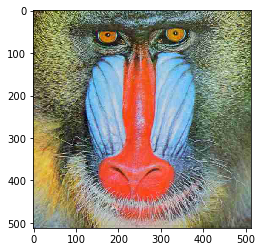

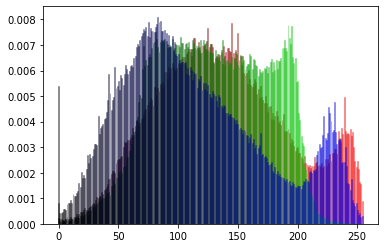

In [141]:
histograma3=histogramaRGB(ImagenFuente)
plt.figure(0)                          
plt.imshow(ImagenFuente)
plt.figure(1)
for i in range(255):
    plt.bar(i, histograma3[0][i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)
for i in range(255):
    plt.bar(i, histograma3[1][i], color = getVerde(i), edgecolor=getVerde(i), alpha=0.33)
for i in range(255):
    plt.bar(i, histograma3[2][i], color = getAzul(i), edgecolor=getAzul(i), alpha=0.33)

### Observaciones:  
Los colores mas brillantes son el Rojo y el Azul y el mas tenue es el que tiene las componentes de verde.

# 4.1 Ecualización del histograma en imágenes en escalas de gris con extensión PGM
Crear una función en Python basada en ciclos que permita realizar la ecualización de imágenes en escala de grises. Los argumentos de entrada serán la imagen a ecualizar y el número de bits, mientras que la salida será la imagen ecualizada. Pruebe la función con la imagen «ParaEcualizar.pgm».
### Solución:  
Creamos una función para leer imagenes en formato pgm y obtner un matriz NxM con los valores en escala de gris de los pixeles que componen la imágen.  
Se creo una funcion para ecualizar el histograma de la imágen.

In [133]:
import re
def read_pgm(filename, byteorder='>'):
    with open(filename, 'rb') as f:
        buffer = f.read()
    try:
        header, width, height, maxval = re.search(
            b"(^P5\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n])*"
            b"(\d+)\s(?:\s*#.*[\r\n]\s)*)", buffer).groups()
    except AttributeError:
        raise ValueError("Not a raw PGM file: '%s'" % filename)
    return np.frombuffer(buffer,
                            dtype='u1' if int(maxval) < 256 else byteorder+'u2',
                            count=int(width)*int(height),
                            offset=len(header)
                            ).reshape((int(height), int(width)))


def ecualizacionGris(Imagen,nbits=8):#Como arreglo
    Ancho=Imagen.shape[0]
    Alto =Imagen.shape[1] 
    histograma=np.zeros(2**nbits,np.float32)
    acumulado=np.zeros(2**nbits,np.float32)
    ImagenNueva = np.zeros((Ancho, Alto))
    for i in range(Ancho):
        for j in range(Alto):
            Pixel = Imagen[i,j]
            histograma[Pixel] += 1
    for i in range(1,255):
        acumulado[i]=histograma[i]+acumulado[i-1]
    for i in range(Ancho):
        for j in range(Alto):
            a=Imagen[i, j];
            c =np.round(((acumulado[a]-1)/(Ancho*Alto-1))*(2**nbits-1))
            ImagenNueva[i, j]=(int(c))#Formato RGB
    return ImagenNueva #Escala de grises en formato RGB


<class 'numpy.ndarray'>


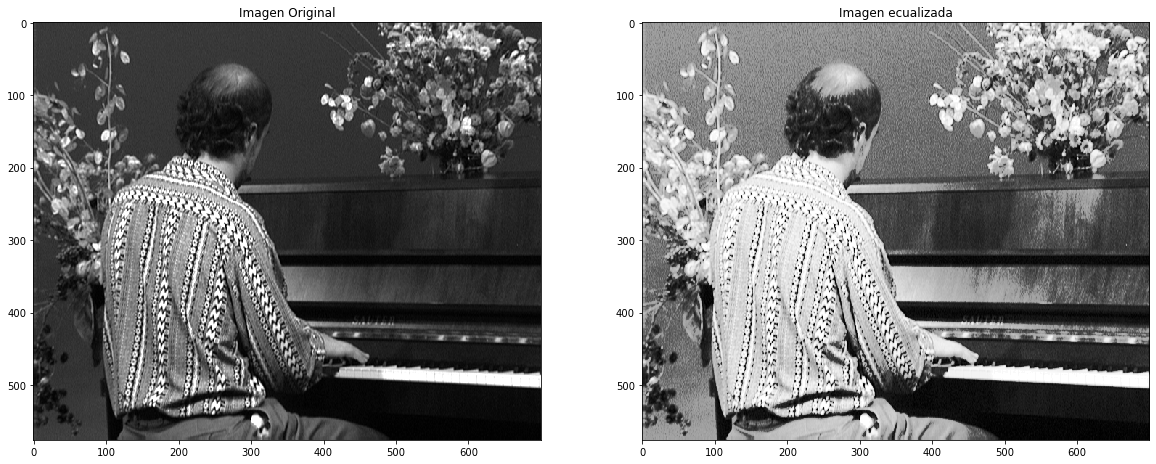

In [158]:
image = read_pgm("imagenes/ParaEcualizar.pgm", byteorder='<')

image2=ecualizacionGris(image)
fig=plt.figure(figsize=(20,20))

ax=fig.add_subplot(1,2,1)
ax.set_title('Imagen Original')
plt.imshow(image, plt.cm.gray)
ax=fig.add_subplot(1,2,2)
ax.set_title('Imagen ecualizada')
plt.imshow(image2, plt.cm.gray)
plt.show()

# 4.2 Ecualización del histograma en imágenes en escalas de gris con extensión jpg  
Ajustar el programa creado en el ítem anterior con el fin de ecualizar la imagen «Via_Lactea.JPG». Considerar el Bias y la saturación en la ecualización (ver histograma en el valor máximo de intensidad).  
### Solución:  
Las imagenes en esto formato pueden ser cargadas directamente con la funciones de la biblioteca PIL empleada en esta practica.

In [129]:
def ecualizacionGrisITU(Imagen,nbits=8):
    Ancho, Alto = Imagen.size
    histograma=np.zeros(2**nbits,np.float32)
    acumulado=np.zeros(2**nbits,np.float32)
    ImagenNueva = Image.new("RGB", (Ancho, Alto), "white")#Formato RGB
    Pixeles = ImagenNueva.load()
    for i in range(Ancho):
        for j in range(Alto):
            Pixel = Imagen.getpixel((i, j))
            Rojo =   Pixel[0]
            Verde = Pixel[1]
            Azul =  Pixel[2]
            Gris = (Rojo * 0.299) + (Verde * 0.587) + (Azul * 0.114)
            Pixeles[i, j] = (int(Gris), int(Gris), int(Gris))
            histograma[int(Gris)] += 1
    for i in range(1,255):
        acumulado[i]=histograma[i]+acumulado[i-1]
    for i in range(Ancho):
        for j in range(Alto):
            a=Pixeles[i, j];
            c =np.round(((acumulado[a[0]]-1)/(Ancho*Alto-1))*(2**nbits-1))
            Pixeles[i, j]=(int(c),int(c),int(c))#Formato RGB
    return ImagenNueva #Escala de grises en formato RGB


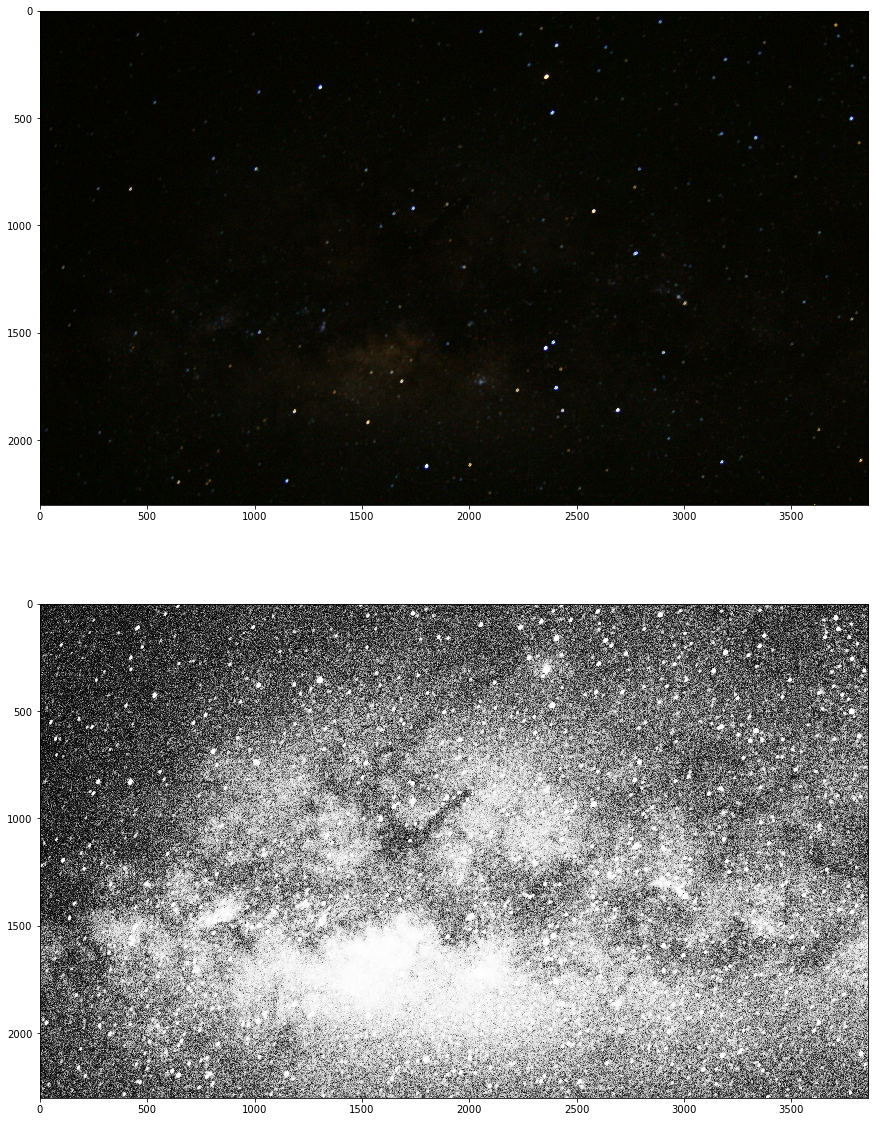

In [130]:
ImagenFuente = Image.open('imagenes/Via_Lactea.JPG')
ImagenEcualizada = ecualizacionGrisITU(ImagenFuente)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,20))
ax1.imshow(ImagenFuente)
ax2.imshow(ImagenEcualizada)
plt.show()

# 5. Transformación Logaritmica
Crear un programa en Python basado en ciclos, que realice la ecualización del histograma por transformación logarítmica de las imágenes «Via_Lactea_Gris.pgm» y “Lena.ppm”. Comparar los resultados obtenidos al utilizar diferentes valores de c.      

In [93]:
def transforamcionLogaritmicaGrisITU(Imagen,C):
    Ancho, Alto = Imagen.size
    ImagenNueva = Image.new("RGB", (Ancho, Alto), "white")#Formato RGB
    Pixeles = ImagenNueva.load()
    for i in range(Ancho):
        for j in range(Alto):
            Pixel = Imagen.getpixel((i, j))
            Rojo =   Pixel[0]
            Verde = Pixel[1]
            Azul =  Pixel[2]
            Gris = (Rojo * 0.299) + (Verde * 0.587) + (Azul * 0.114)
            Pixeles[i, j] = (int(Gris), int(Gris), int(Gris))
    for i in range(Ancho):
        for j in range(Alto):
            a=Pixeles[i, j];
            p =C*np.log(1+a[0])
            Pixeles[i, j]=(int(p),int(p),int(p))#Formato RGB
    return ImagenNueva #Escala de grises en formato RGB

def transoformacionLogaritmicaGris(Imagen,C):#Como arreglo
    Ancho=Imagen.shape[0]
    Alto =Imagen.shape[1] 
    ImagenNueva = np.zeros((Ancho, Alto))
    for i in range(Ancho):
        for j in range(Alto):
            a=Imagen[i, j];
            ImagenNueva[i, j]=int(C*np.log(1+a))
    return ImagenNueva #Escala de grises en formato RGB


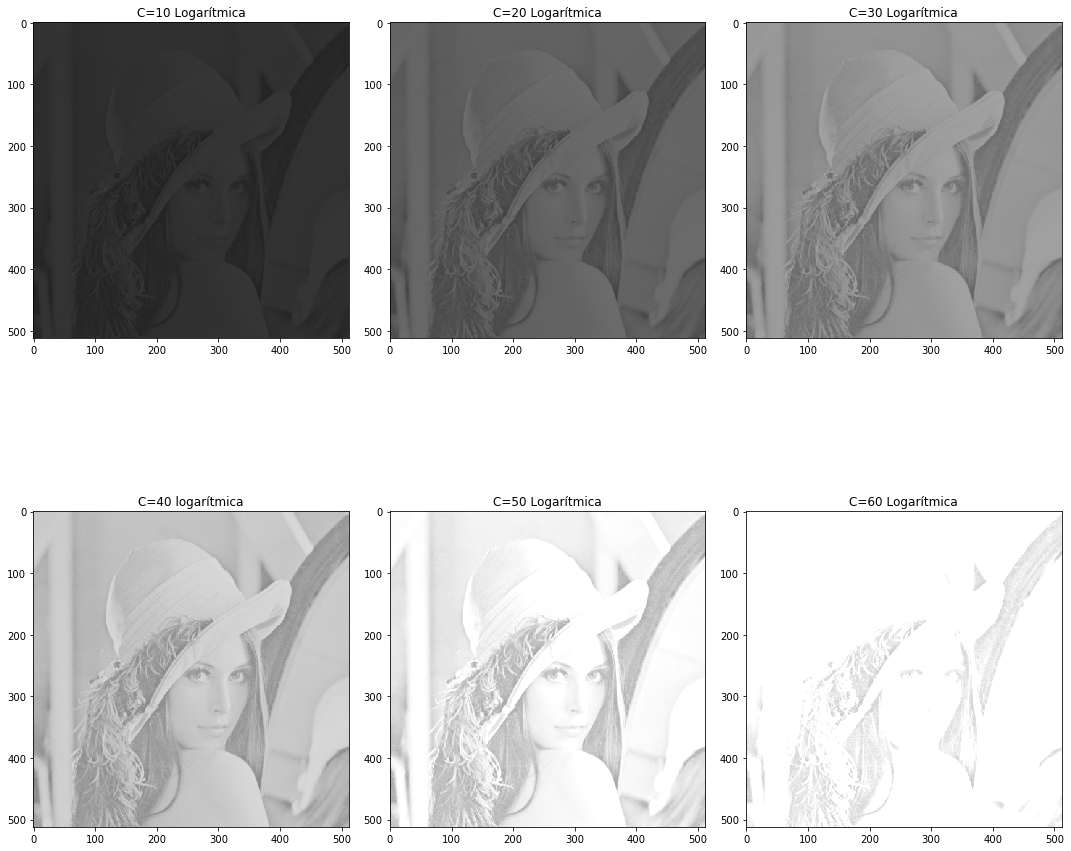

In [186]:
ImagenFuente1 = Image.open('imagenes/lena.ppm')

histograma_0=histogramaGrisITU(ImagenFuente1);

fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(2,3,1)

#Con C=10
ax.set_title('C=10 Logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,10)
histograma_1=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
#Con C=20
ax=fig.add_subplot(2,3,2)
ax.set_title('C=20 Logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,20)
histograma_2=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
#Con C=30
ax=fig.add_subplot(2,3,3)
ax.set_title('C=30 Logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,30)
histograma_3=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=40
ax=fig.add_subplot(2,3,4)
ax.set_title('C=40 logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,40)
histograma_4=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=50
ax=fig.add_subplot(2,3,5)
ax.set_title('C=50 Logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,50)
histograma_5=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=60
ax=fig.add_subplot(2,3,6)
ax.set_title('C=60 Logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,60)
histograma_6=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
fig.tight_layout()
plt.show()

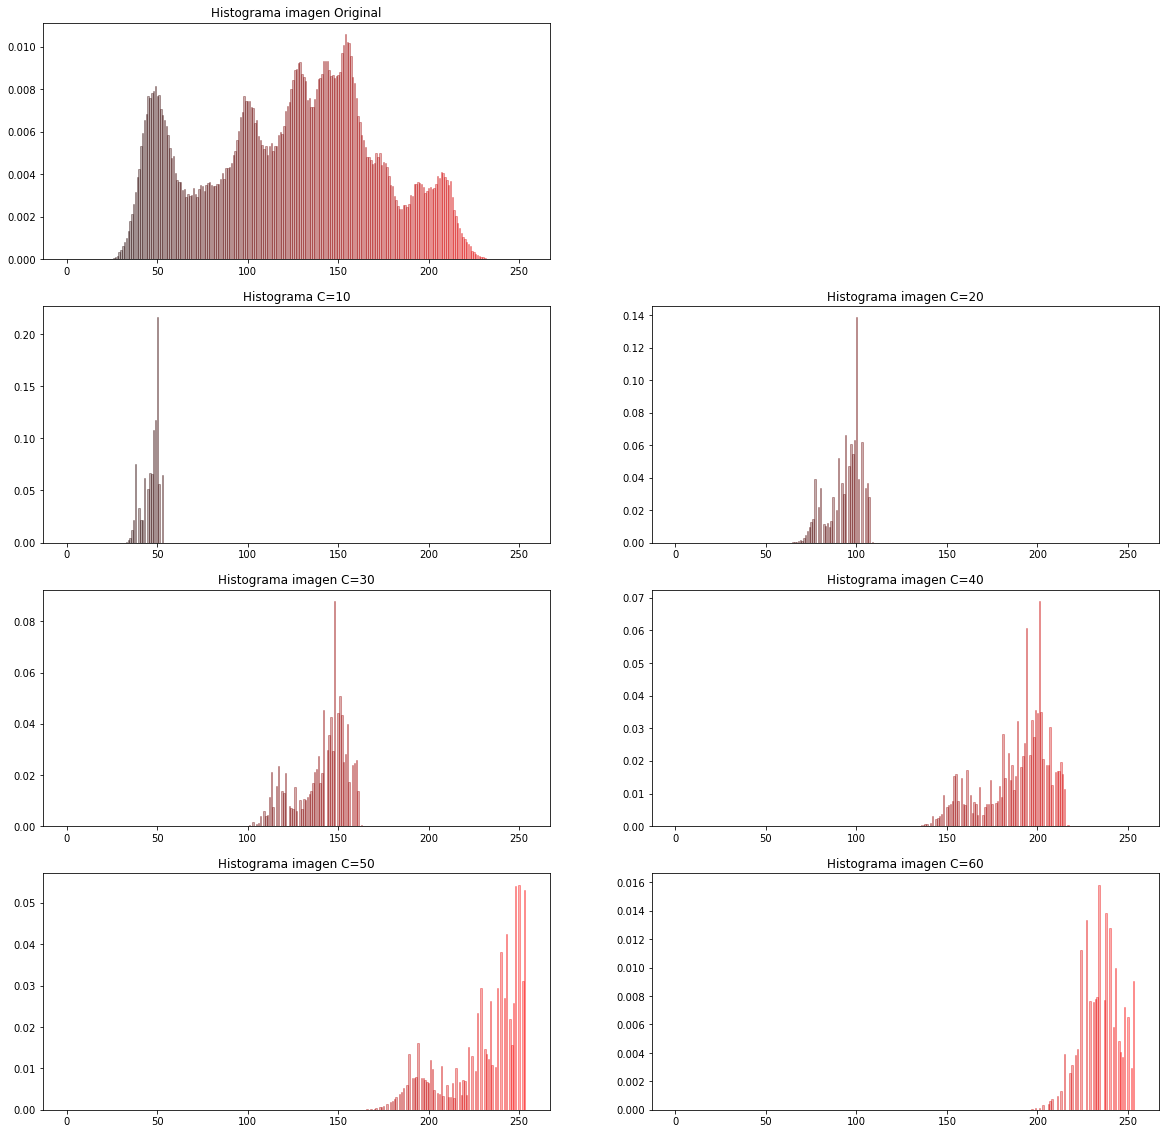

In [187]:
#Mostrando el histograma de Lena 
fig= plt.figure(figsize=(20,20))

ax = fig.add_subplot(4,2,1)
ax.set_title('Histograma imagen Original')
for i in range(0, 255):
    plt.bar(i, histograma_0[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax=fig.add_subplot(4,2,2)
ax.set_visible(False)

ax = fig.add_subplot(4,2,3)
ax.set_title('Histograma C=10')
for i in range(0, 255):
    plt.bar(i, histograma_1[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,4)
ax.set_title('Histograma imagen C=20')
for i in range(0, 255):
    plt.bar(i, histograma_2[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,5)
ax.set_title('Histograma imagen C=30')
for i in range(0, 255):
    plt.bar(i, histograma_3[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,6)
ax.set_title('Histograma imagen C=40')
for i in range(0, 255):
    plt.bar(i, histograma_4[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)


ax = fig.add_subplot(4,2,7)
ax.set_title('Histograma imagen C=50')
for i in range(0, 255):
    plt.bar(i, histograma_5[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,8)
ax.set_title('Histograma imagen C=60')
for i in range(0, 255):
    plt.bar(i, histograma_6[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

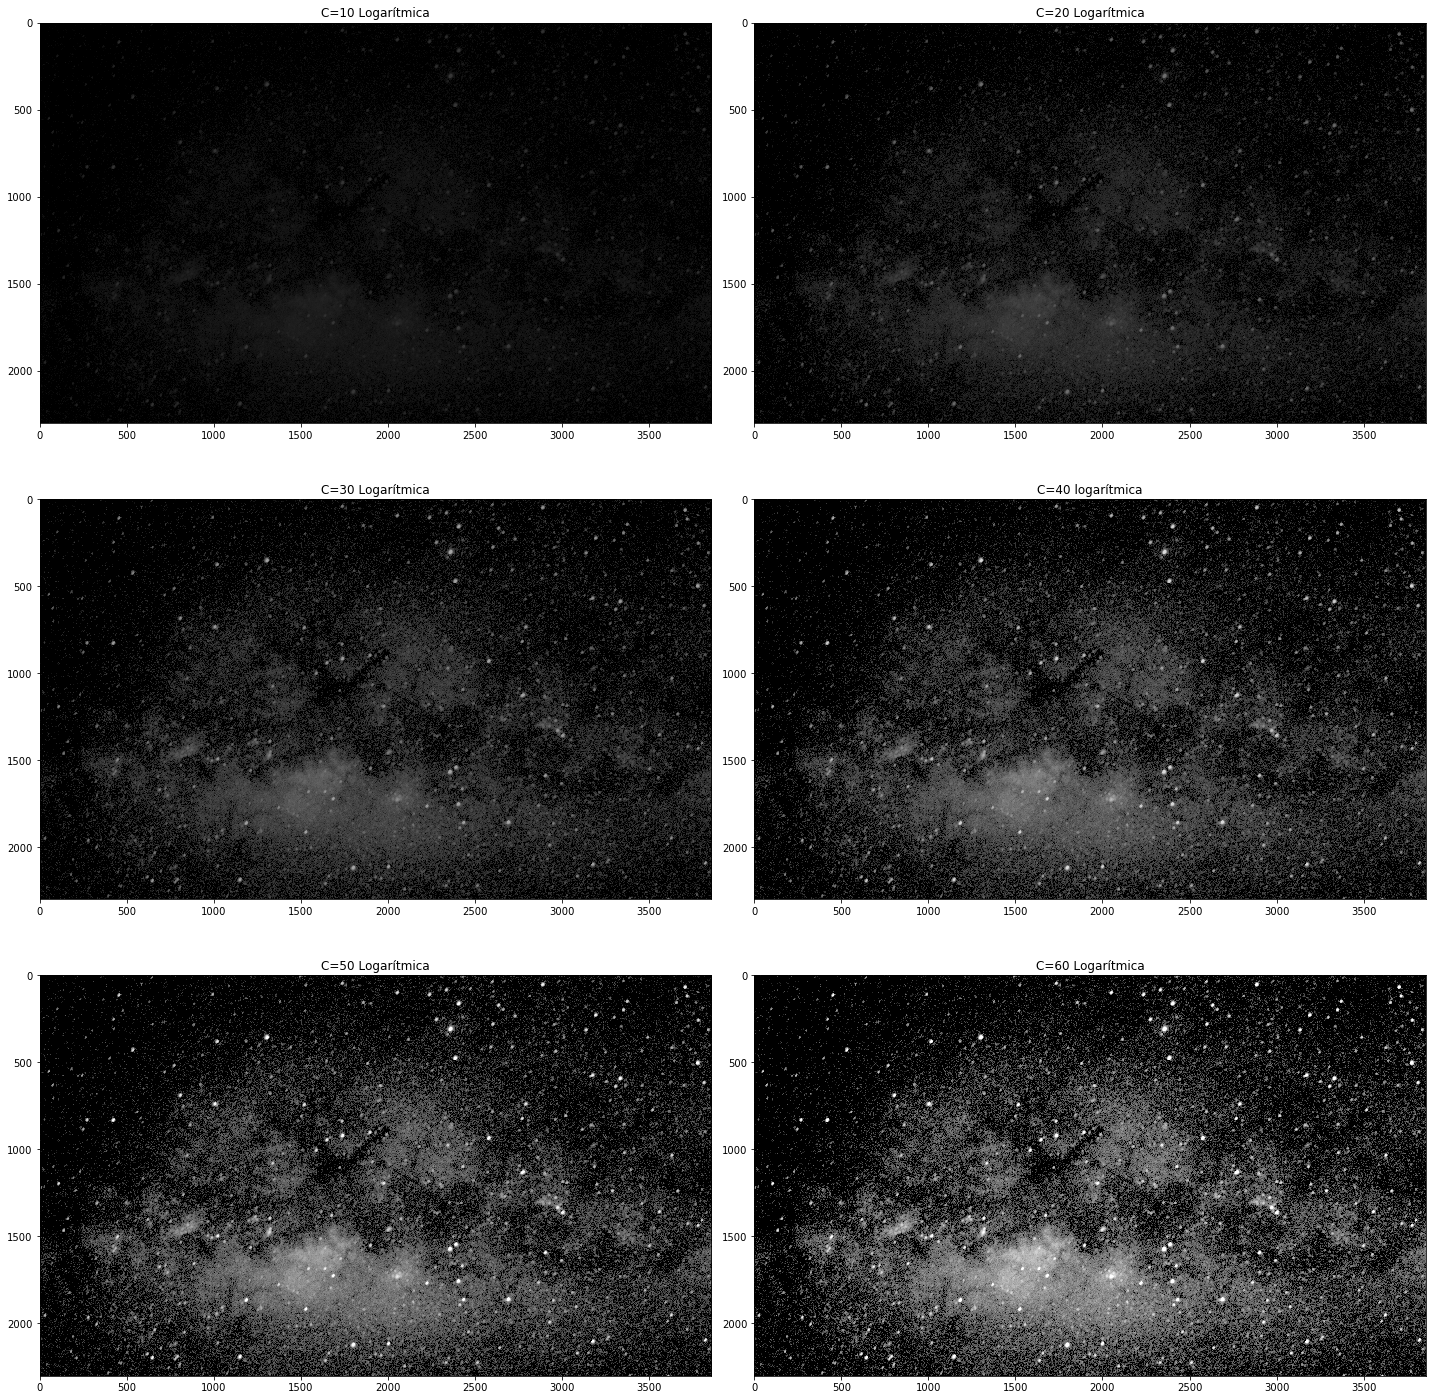

In [192]:
from PIL import Image
from matplotlib import cm


#ImagenFuente1 = read_pgm("imagenes/Via_Lactea_Gris.pgm", byteorder='<')

ImagenFuente2=Image.open('imagenes/Via_Lactea_Gris.pgm')
ImagenFuente1 = Image.new("RGBA", ImagenFuente2.size)
ImagenFuente1.paste(ImagenFuente2)

histograma_0=histogramaGrisITU(ImagenFuente1);

fig=plt.figure(figsize=(20,20))
ax=fig.add_subplot(3,2,1)

#Con C=10
ax.set_title('C=10 Logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,10)
histograma_1=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
#Con C=20
ax=fig.add_subplot(3,2,2)
ax.set_title('C=20 Logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,20)
histograma_2=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
#Con C=30
ax=fig.add_subplot(3,2,3)
ax.set_title('C=30 Logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,30)
histograma_3=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=40
ax=fig.add_subplot(3,2,4)
ax.set_title('C=40 logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,40)
histograma_4=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=50
ax=fig.add_subplot(3,2,5)
ax.set_title('C=50 Logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,50)
histograma_5=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=60
ax=fig.add_subplot(3,2,6)
ax.set_title('C=60 Logarítmica')
ImagenTransformada1=transforamcionLogaritmicaGrisITU(ImagenFuente1,60)
histograma_6=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
fig.tight_layout()
plt.show()

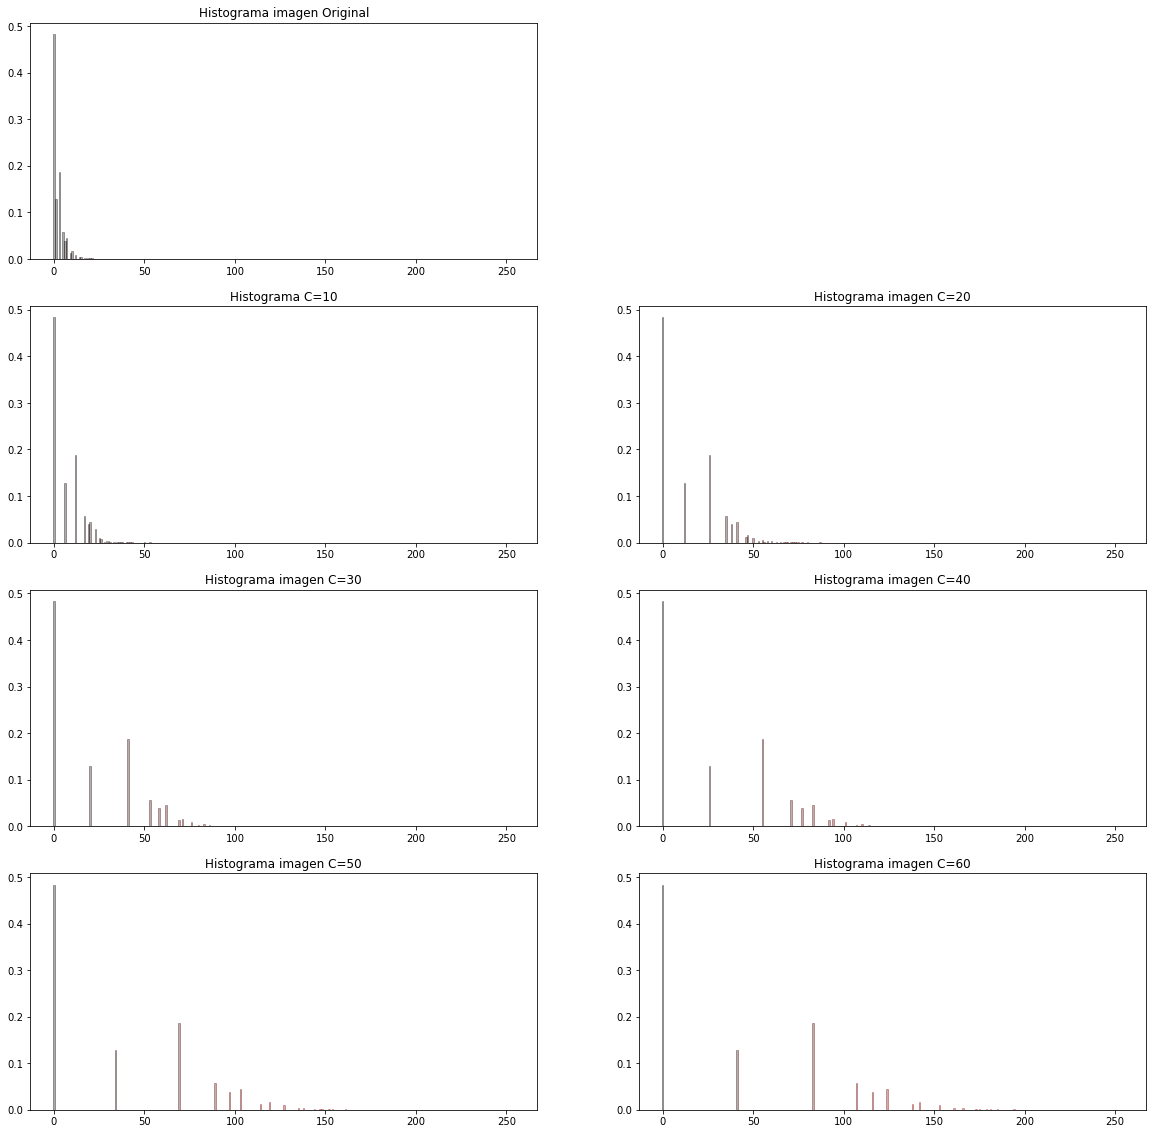

In [193]:
#Mostrando el histograma Via Lactea
fig= plt.figure(figsize=(20,20))


ax = fig.add_subplot(4,2,1)
ax.set_title('Histograma imagen Original')
for i in range(0, 255):
    plt.bar(i, histograma_0[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax=fig.add_subplot(4,2,2)
ax.set_visible(False)

ax = fig.add_subplot(4,2,3)
ax.set_title('Histograma C=10')
for i in range(0, 255):
    plt.bar(i, histograma_1[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,4)
ax.set_title('Histograma imagen C=20')
for i in range(0, 255):
    plt.bar(i, histograma_2[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,5)
ax.set_title('Histograma imagen C=30')
for i in range(0, 255):
    plt.bar(i, histograma_3[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,6)
ax.set_title('Histograma imagen C=40')
for i in range(0, 255):
    plt.bar(i, histograma_4[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)


ax = fig.add_subplot(4,2,7)
ax.set_title('Histograma imagen C=50')
for i in range(0, 255):
    plt.bar(i, histograma_5[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,8)
ax.set_title('Histograma imagen C=60')
for i in range(0, 255):
    plt.bar(i, histograma_6[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

### 6. Transformación Gamma    
Repita el procedimiento anterior pero ahora aplicando la ecualización por ajuste de Gamma. Comparar los resultados obtenidos y concluir.

In [126]:
def transformacionGammaGris(Imagen,C,G):#Como arreglo
    Ancho=Imagen.shape[0]
    Alto =Imagen.shape[1] 
    ImagenNueva = np.zeros((Ancho, Alto))
    for i in range(Ancho):
        for j in range(Alto):
            a=Imagen[i, j];
            ImagenNueva[i, j]=np.uint8(C*np.power(a,G))
    return ImagenNueva #Escala de grises en formato RGB

def transformacionGammaGrisITU(Imagen,C,G):
    Ancho, Alto = Imagen.size
    ImagenNueva = Image.new("RGB", (Ancho, Alto), "white")#Formato RGB
    Pixeles = ImagenNueva.load()
    for i in range(Ancho):
        for j in range(Alto):
            Pixel = Imagen.getpixel((i, j))
            Rojo =   Pixel[0]
            Verde = Pixel[1]
            Azul =  Pixel[2]
            Gris = (Rojo * 0.299) + (Verde * 0.587) + (Azul * 0.114)
            Pixeles[i, j] = (np.uint8(Gris), np.uint8(Gris), np.uint8(Gris))
    for i in range(Ancho):
        for j in range(Alto):
            a=Pixeles[i, j];
            p =C*np.power(a[0],G)
            Pixeles[i, j]=(np.uint8(p),np.uint8(p),np.uint8(p))#Formato RGB
    return ImagenNueva #Escala de grises en formato RGB

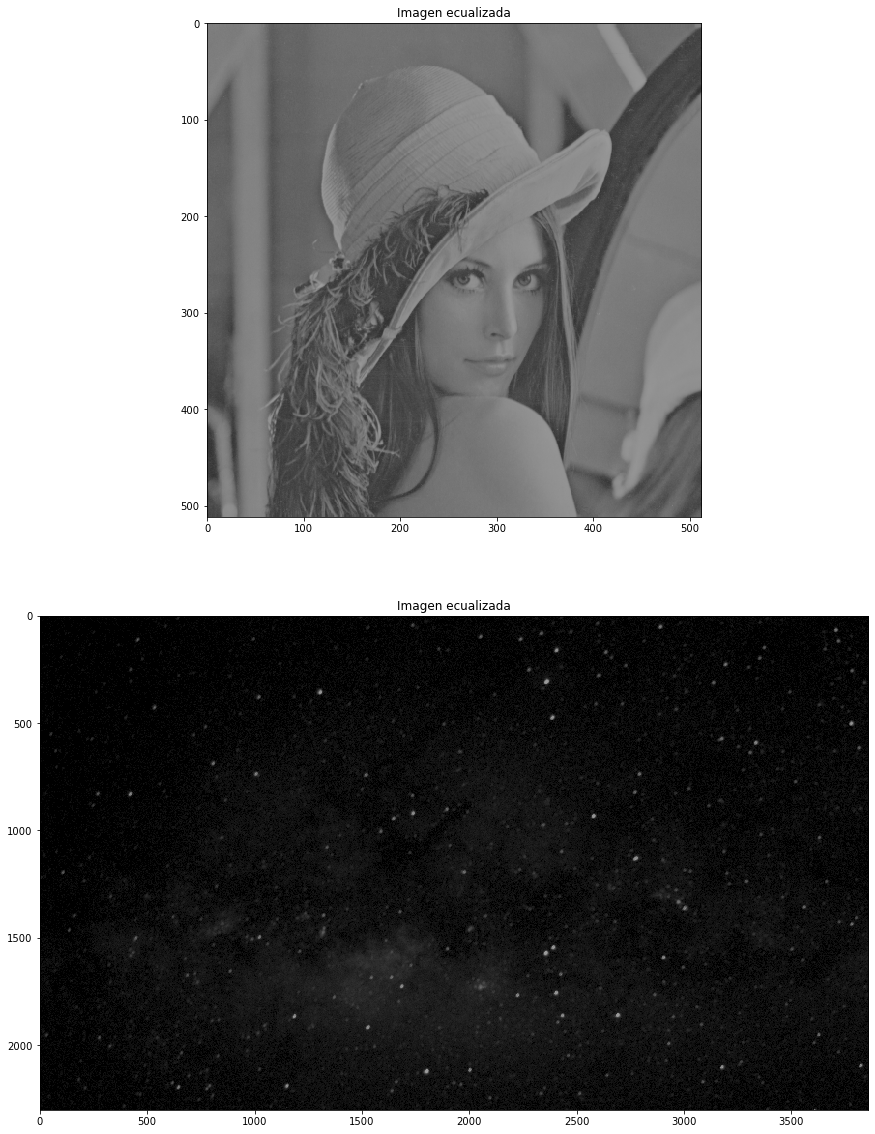

In [97]:
ImagenFuente1 = Image.open('imagenes/lena.ppm')
ImagenFuente2 = read_pgm("imagenes/Via_Lactea_Gris.pgm", byteorder='<')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.5)
ImagenTransformada2=transformacionGammaGris(ImagenFuente2,10,0.5)
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(20,20))

ax1.set_title('Imagen ecualizada')
ax2.set_title('Imagen ecualizada')
ax1.imshow(ImagenTransformada1)
ax2.imshow(ImagenTransformada2,cmap='gray', vmin=0, vmax=255)

plt.show()

<h2 style="color:olive"> Variando C </h2>

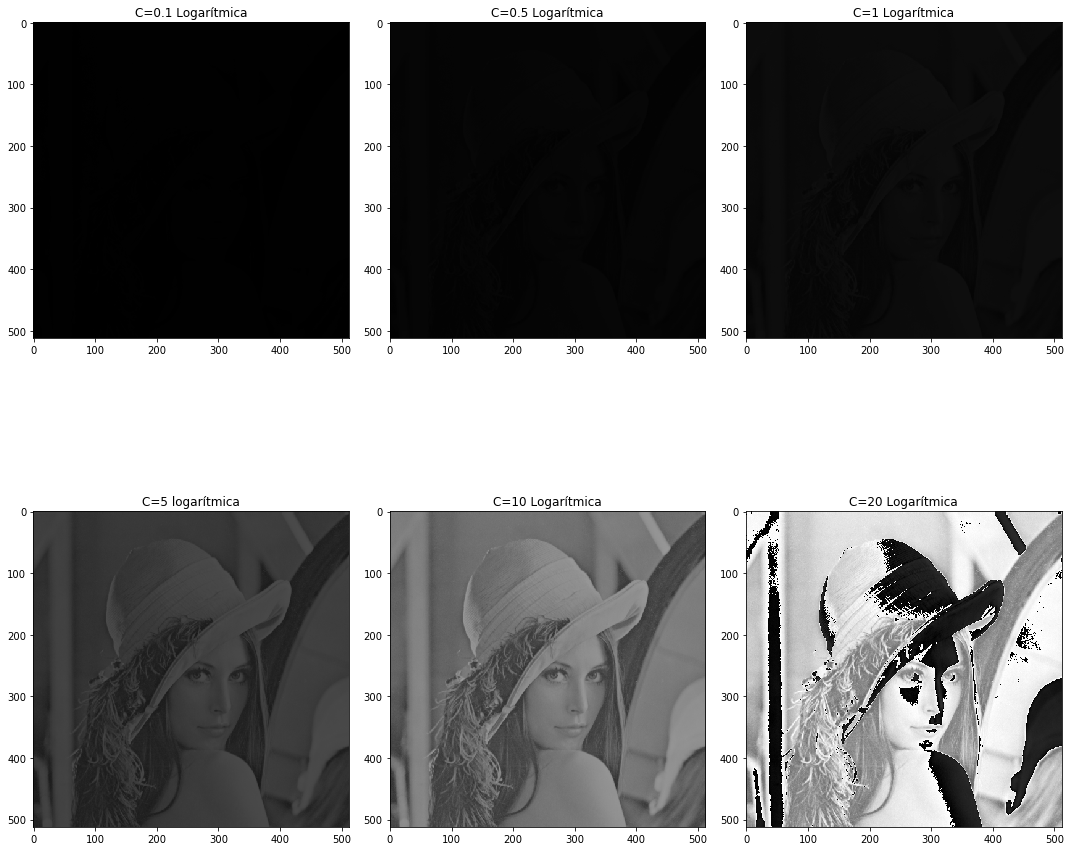

In [202]:
ImagenFuente1 = Image.open('imagenes/lena.ppm')

fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(2,3,1)
histograma_0=histogramaGrisITU(ImagenFuente1)
#Con C=10
ax.set_title('C=0.1 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,0.1,0.5)
histograma_1=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
#Con C=20
ax=fig.add_subplot(2,3,2)
ax.set_title('C=0.5 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,0.5,0.5)
histograma_2=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
#Con C=30
ax=fig.add_subplot(2,3,3)
ax.set_title('C=1 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,1,0.5)
histograma_3=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=40
ax=fig.add_subplot(2,3,4)
ax.set_title('C=5 logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,5,0.5)
histograma_4=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=50
ax=fig.add_subplot(2,3,5)
ax.set_title('C=10 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.5)
histograma_5=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=60
ax=fig.add_subplot(2,3,6)
ax.set_title('C=20 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,20,0.5)
histograma_6=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
fig.tight_layout()
plt.show()

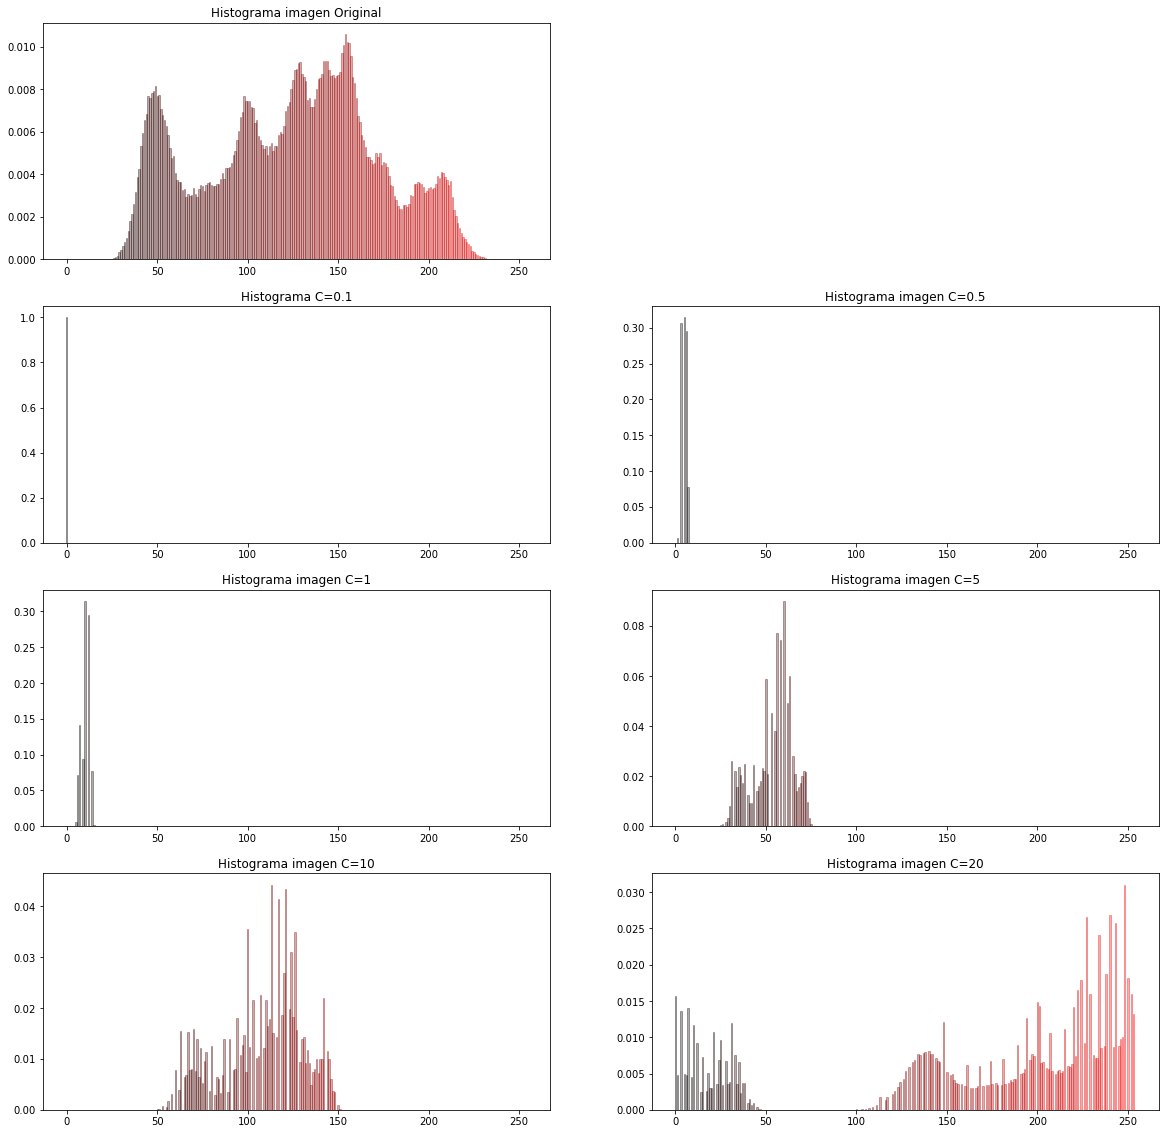

In [204]:
#Mostrando el histograma Lena
fig= plt.figure(figsize=(20,20))

ax = fig.add_subplot(4,2,1)
ax.set_title('Histograma imagen Original')
for i in range(0, 255):
    plt.bar(i, histograma_0[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax=fig.add_subplot(4,2,2)
ax.set_visible(False)

ax = fig.add_subplot(4,2,3)
ax.set_title('Histograma C=0.1')
for i in range(0, 255):
    plt.bar(i, histograma_1[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,4)
ax.set_title('Histograma imagen C=0.5')
for i in range(0, 255):
    plt.bar(i, histograma_2[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,5)
ax.set_title('Histograma imagen C=1')
for i in range(0, 255):
    plt.bar(i, histograma_3[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,6)
ax.set_title('Histograma imagen C=5')
for i in range(0, 255):
    plt.bar(i, histograma_4[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)


ax = fig.add_subplot(4,2,7)
ax.set_title('Histograma imagen C=10')
for i in range(0, 255):
    plt.bar(i, histograma_5[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,8)
ax.set_title('Histograma imagen C=20')
for i in range(0, 255):
    plt.bar(i, histograma_6[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

<h2 style="color:olive"> Variando G </h2>

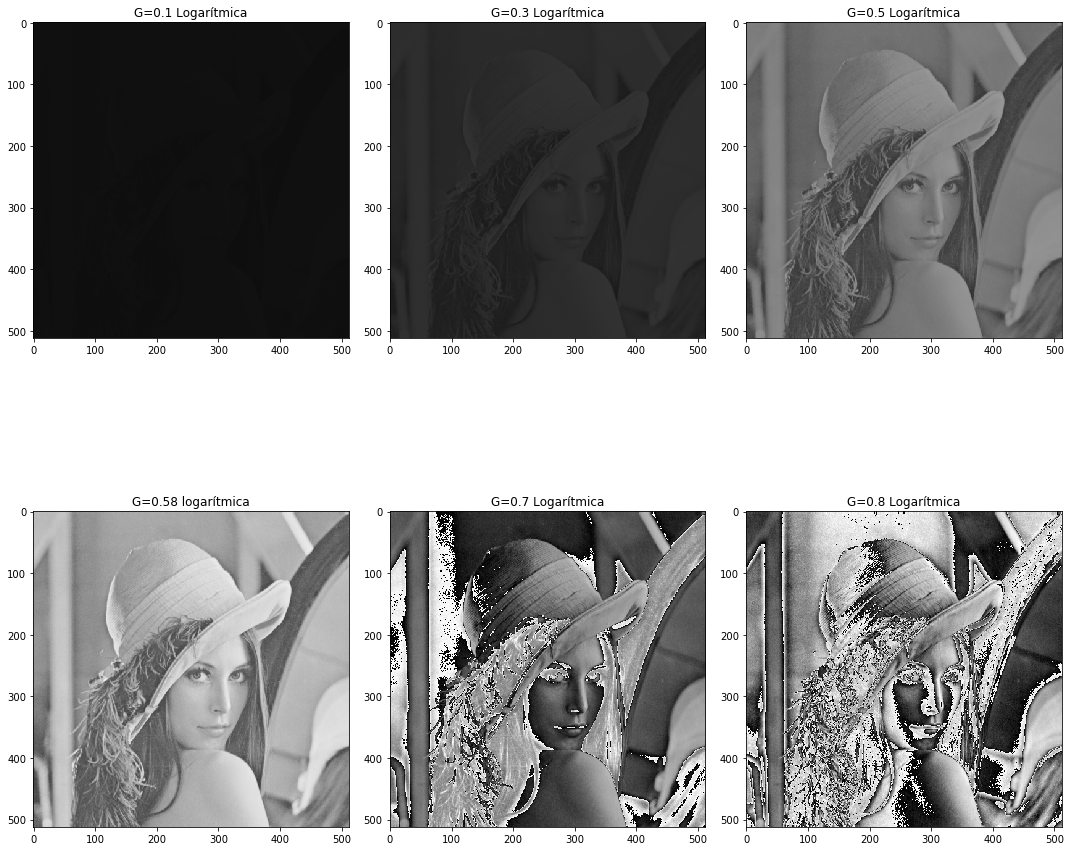

In [212]:
ImagenFuente1 = Image.open('imagenes/lena.ppm')

histograma_0=histogramaGrisITU(ImagenFuente1)

fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(2,3,1)

#Con C=10
ax.set_title('G=0.1 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.1)
histograma_1=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
#Con C=20
ax=fig.add_subplot(2,3,2)
ax.set_title('G=0.3 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.3)
histograma_2=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
#Con C=30
ax=fig.add_subplot(2,3,3)
ax.set_title('G=0.5 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.5)
histograma_3=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=40
ax=fig.add_subplot(2,3,4)
ax.set_title('G=0.58 logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.58)
histograma_4=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=50
ax=fig.add_subplot(2,3,5)
ax.set_title('G=0.7 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.7)
histograma_5=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=60
ax=fig.add_subplot(2,3,6)
ax.set_title('G=0.8 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.8)
histograma_6=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
fig.tight_layout()
plt.show()

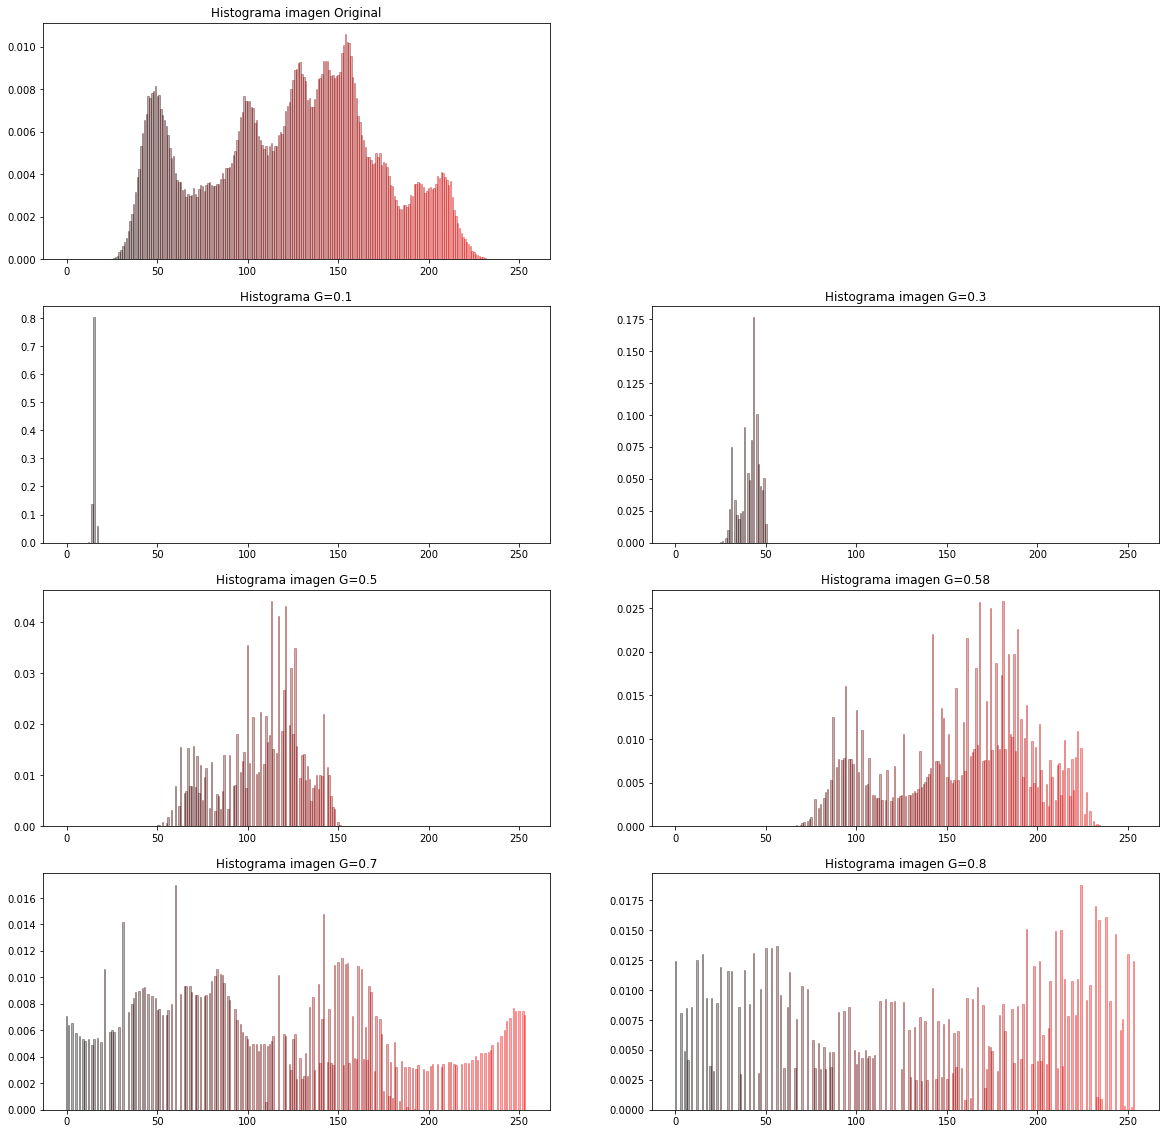

In [214]:
#Mostrando el histograma Lena
fig= plt.figure(figsize=(20,20))

ax = fig.add_subplot(4,2,1)
ax.set_title('Histograma imagen Original')
for i in range(0, 255):
    plt.bar(i, histograma_0[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax=fig.add_subplot(4,2,2)
ax.set_visible(False)

ax = fig.add_subplot(4,2,3)
ax.set_title('Histograma G=0.1')
for i in range(0, 255):
    plt.bar(i, histograma_1[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,4)
ax.set_title('Histograma imagen G=0.3')
for i in range(0, 255):
    plt.bar(i, histograma_2[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,5)
ax.set_title('Histograma imagen G=0.5')
for i in range(0, 255):
    plt.bar(i, histograma_3[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,6)
ax.set_title('Histograma imagen G=0.58')
for i in range(0, 255):
    plt.bar(i, histograma_4[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)


ax = fig.add_subplot(4,2,7)
ax.set_title('Histograma imagen G=0.7')
for i in range(0, 255):
    plt.bar(i, histograma_5[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,8)
ax.set_title('Histograma imagen G=0.8')
for i in range(0, 255):
    plt.bar(i, histograma_6[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

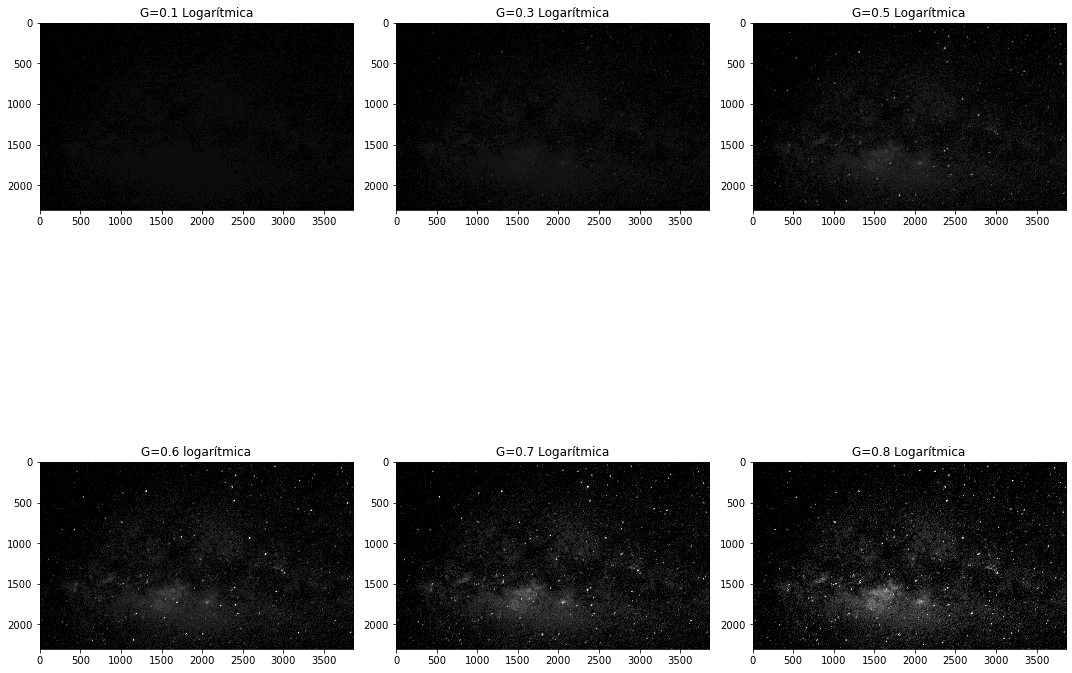

In [208]:
ImagenFuente2=Image.open('imagenes/Via_Lactea_Gris.pgm')
ImagenFuente1 = Image.new("RGBA", ImagenFuente2.size)
ImagenFuente1.paste(ImagenFuente2)

histograma_0=histogramaGrisITU(ImagenFuente1)

fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(2,3,1)

#Con C=10
ax.set_title('G=0.1 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.1)
histograma_1=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
#Con C=20
ax=fig.add_subplot(2,3,2)
ax.set_title('G=0.3 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.3)
histograma_2=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
#Con C=30
ax=fig.add_subplot(2,3,3)
ax.set_title('G=0.5 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.5)
histograma_3=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=40
ax=fig.add_subplot(2,3,4)
ax.set_title('G=0.6 logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.6)
histograma_4=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=50
ax=fig.add_subplot(2,3,5)
ax.set_title('G=0.7 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.7)
histograma_5=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)

#Con C=60
ax=fig.add_subplot(2,3,6)
ax.set_title('G=0.8 Logarítmica')
ImagenTransformada1=transformacionGammaGrisITU(ImagenFuente1,10,0.8)
histograma_6=histogramaGrisITU(ImagenTransformada1);
ax.imshow(ImagenTransformada1)
fig.tight_layout()
plt.show()

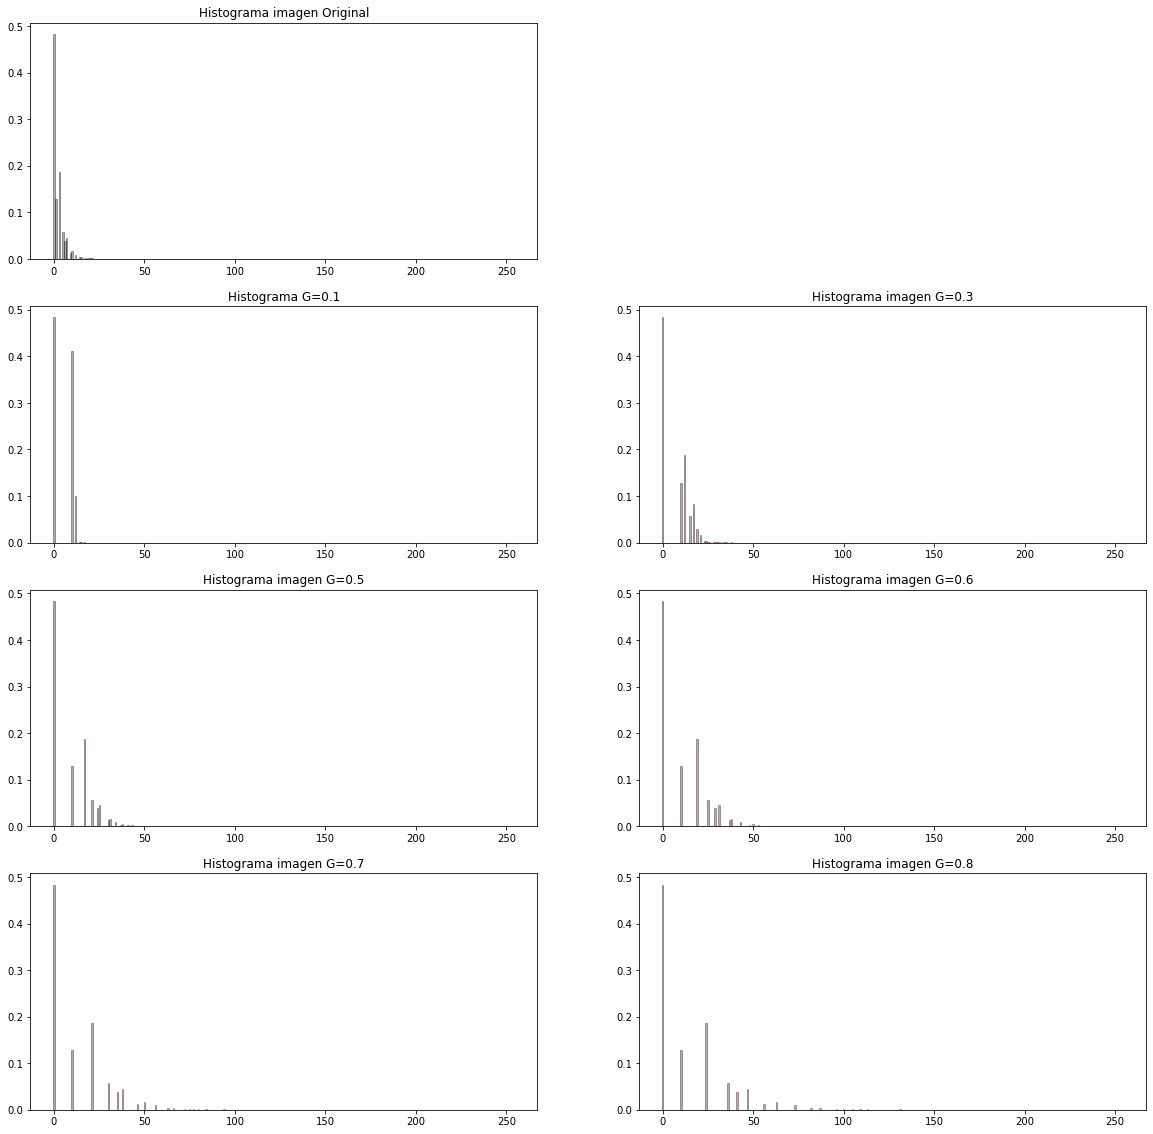

In [209]:
#Mostrando el histograma Via Lactea
fig= plt.figure(figsize=(20,20))

ax = fig.add_subplot(4,2,1)
ax.set_title('Histograma imagen Original')
for i in range(0, 255):
    plt.bar(i, histograma_0[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax=fig.add_subplot(4,2,2)
ax.set_visible(False)

ax = fig.add_subplot(4,2,3)
ax.set_title('Histograma G=0.1')
for i in range(0, 255):
    plt.bar(i, histograma_1[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,4)
ax.set_title('Histograma imagen G=0.3')
for i in range(0, 255):
    plt.bar(i, histograma_2[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,5)
ax.set_title('Histograma imagen G=0.5')
for i in range(0, 255):
    plt.bar(i, histograma_3[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,6)
ax.set_title('Histograma imagen G=0.6')
for i in range(0, 255):
    plt.bar(i, histograma_4[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)


ax = fig.add_subplot(4,2,7)
ax.set_title('Histograma imagen G=0.7')
for i in range(0, 255):
    plt.bar(i, histograma_5[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

ax = fig.add_subplot(4,2,8)
ax.set_title('Histograma imagen G=0.8')
for i in range(0, 255):
    plt.bar(i, histograma_6[i], color = getRojo(i), edgecolor=getRojo(i), alpha=0.33)

<hr style="height:1px;border-top:1px solid #f00" />
<h2 style>Análisis</h2>
<h2 style="color:olive"> Ecualización Logaritmica</h2>

Lo primero que se nota con la ecualización logaritmica es que en el histograma los valores de los pixeles son menores al original, a valores menores del parámetro $C$ mas estrecho es el histograma, con valores de $C$ pequeños la imágen es oscura, es decir el histograma se ubica en el lado izquierdo, a medida que $C$ aumenta el histograma empieza a desplazarse hacia la derecha, haciendo la imágen más clara mejorando el brillo pero manteniendo una representación de pixeles menor a la imagen original, finalmente valores muy grandes de $C$ comienzan la imagen se vuelve muy blanca ya que el histograma se desplaza totalmente a la derecha desemjorando los detalles de la imagen.

Cuando se probó con la imagen de la Via Lactea, con alto contenido de color de fondo negro, se notó que intentaba correr los valores que no eran de fondo hacia la derecha cuanto más se aumentaba el valor de $C$ haciendo que los objetos celestes mejoraran en contraste con respecto al fondo aumentando su brillantez.

<h2 style="color:olive"> Ecualización Gamma</h2>
Al variar $C$ a valores menores a 1 el histograma toma valores cercanos a cero oscureciendo la imagen, a medida que $C$ aumenta el histograma se desplaza a la derecha mejorando el contraste, sin embargo, con valores grandes de $C$ empiezan a aparecer valores en el lado izquierdo del histograma creando áreas oscuras en la imagenes y tambien picos de blancos que hacen que la imagen pierda fidelidad.

con la variación del parámetro $G$ se nota un mejor contraste que se observó claramente en la imágen de la Via Lactea, sin embargo, en la imagen de Lena cuando $G$ es alto los valores del histograman empiezan a distribuirsen por todo el eje, haciendo que la imagen pierda fidelidad.


# Referencias

(<a id="cit-Gonzalez:2001:DIP:559707" href="#call-Gonzalez:2001:DIP:559707">Gonzalez and Woods, 2001</a>) Rafael C. Gonzalez and Richard E. Woods, ``_Digital Image Processing_'',  2001.

(<a id="cit-Gonzalez:2003:DIP:993475" href="#call-Gonzalez:2003:DIP:993475">Gonzalez, Woods <em>et al.</em>, 2003</a>) Rafael C. Gonzalez, Richard E. Woods and Steven L. Eddins, ``_Digital Image Processing Using MATLAB_'',  2003.

(<a id="cit-ITU" href="#ITU">ITU<em>et al.</em>, 2011</a>) ITU, ``
https://www.itu.int/rec/R-REC-BT.601-7-201103-I/en'',  Noviembre 2019.

(<a id="Python" href="#ITU">Python<em>et al.</em>, 2019</a>) Python, ``
https://www.codementor.io/isaib.cicourel/image-manipulation-in-python-du1089j1u  '',  Noviembre 2019.

(<a id="Stackoverflow" href="#so3">StackOverflow<em>et al.</em>, 2019</a>) Stackoverflow, ``
https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python '',  Noviembre 2019.


(<a id="Mpl1" href="#so">Matplolib<em>et al.</em>, 2019</a>) Python, ``
https://matplotlib.org/3.1.1/tutorials/introductory/images.html'',  Noviembre 2019.

(<a id="Mpl2" href="#so2">Matplolib2<em>et al.</em>, 2019</a>) Python, ``
https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/image_masked.html#sphx-glr-gallery-images-contours-and-fields-image-masked-py

'',  Noviembre 2019.
